# Exercise - Complete so that all Cells Work

## Dictionary comprehensions review

In [2]:
a = [1,2,3,4]
b = []
for item in a:
    b.append(item * 3)

b

[3, 6, 9, 12]

In [3]:
# dictionary comprehensions
c = {0:1, 1:2, 2:3}
d = {key: value*7  for key,value in c.items() if key == 1}
d

{1: 14}

In [9]:
[i for i in c.values()]

[1, 2, 3]

In [6]:
e = {"name" : "Micah", "age":27}
e['name']

'Micah'

In [6]:
# list comprehensions
a = [1, 2, 3]
r = [item*3  for item in a if item < 3]

d = {index: item*3  for index, item in enumerate(a) if item < 3 }
d , r

({0: 3, 1: 6}, [3, 6])

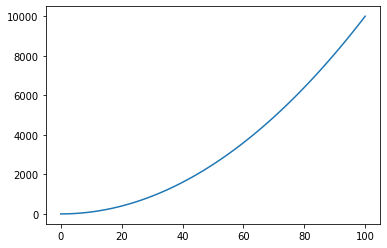

In [14]:
import matplotlib.pyplot as plt
x = [i for i in range(101)]
y = []
def f(x):
    return x * x
for item in x:
    y.append(f(item))

plt.plot(x,y);

## Data structures 

In [ ]:
### warm up on nested dictionaries

In [19]:
p1 = {'name': 'John', 'age': '27', 'sex': 'Male'}
p2 = {'name': 'Marie', 'age': '22', 'sex': 'Female'}
people = {1: {'name': 'John', 'age': '27', 'sex': 'Male'},
          2: {'name': 'Marie', 'age': '22', 'sex': 'Female'},
          3: {'name': 'Anna', 'age':'22', 'sex': 'Female'}}

# person = people[1]
# print(person)
# person['name'] = 'Fred'
print(people)


{1: {'name': 'John', 'age': '27', 'sex': 'Male'}, 2: {'name': 'Marie', 'age': '22', 'sex': 'Female'}, 3: {'name': 'Anna', 'age': '22', 'sex': 'Female'}}


###  flat file using unique keys

In [20]:
# db is a dictionary of lists named {students: [], psets: [], grades: []}
def empty():
    return {"students": [],
            "psets": [],
            "grades": []}
# Add a new student to the database.
def addStudent(db, student_id, student_name):   # students is a list of 
    db["students"].append({"id": student_id,
                           "name": student_name})
# Add a new pset to the database.
def addPset(db, pset_id, pset_total_points):
    db["psets"].append({"id": pset_id,
                        "points": pset_total_points})
# Record a student's grade on a pset.
def addGrade(db, student_id, pset_id, points):
    db["grades"].append({"student": student_id,
                         "pset": pset_id,
                         "points": points})
db = empty()

In [21]:
print(db)

{'students': [], 'psets': [], 'grades': []}


In [22]:
# add data to db
addStudent(db, 1, "Alice")
addStudent(db, 2, "Bob")
addStudent(db, 3, "Charlie")

addPset(db, 1, 10)
addPset(db, 2, 20)
addPset(db, 3, 30)

addGrade(db, 1, 1, 10)
addGrade(db, 1, 2, 18)
addGrade(db, 1, 3, 25)
addGrade(db, 2, 3, 15)
addGrade(db, 3, 3, 10)
print(db)

{'students': [{'id': 1, 'name': 'Alice'}, {'id': 2, 'name': 'Bob'}, {'id': 3, 'name': 'Charlie'}], 'psets': [{'id': 1, 'points': 10}, {'id': 2, 'points': 20}, {'id': 3, 'points': 30}], 'grades': [{'student': 1, 'pset': 1, 'points': 10}, {'student': 1, 'pset': 2, 'points': 18}, {'student': 1, 'pset': 3, 'points': 25}, {'student': 2, 'pset': 3, 'points': 15}, {'student': 3, 'pset': 3, 'points': 10}]}


In [23]:
mydb = {'students': [{'id': 1, 'name': 'Alice'}, 
              {'id': 2, 'name': 'Bob'}, 
              {'id': 3, 'name': 'Charlie'}], 
 'psets': [{'id': 1, 'points': 10}, 
           {'id': 2, 'points': 20}, 
           {'id': 3, 'points': 30}], 
 'grades': [{'student': 1, 'pset': 1, 'points': 10}, 
            {'student': 1, 'pset': 2, 'points': 18}, 
            {'student': 1, 'pset': 3, 'points': 25}, 
            {'student': 2, 'pset': 3, 'points': 15}, 
            {'student': 3, 'pset': 3, 'points': 10}]}

# get a student's grade for a given pset
def getGrade(student_id, pset_id):
    return {"grade": row["points"] for row in mydb["grades"] 
            if row["student"] == student_id and row["pset"] == pset_id}

print(getGrade(2, 3))

{'grade': 15}


### Look up a student name by Id and print
### Notice the use of comprehension

In [24]:
student_id = 2   # this search is O(N)
print({"name": s['name'] for s in db['students'] if s["id"] == student_id})

{'name': 'Bob'}


In [25]:
db['grades']

[{'student': 1, 'pset': 1, 'points': 10},
 {'student': 1, 'pset': 2, 'points': 18},
 {'student': 1, 'pset': 3, 'points': 25},
 {'student': 2, 'pset': 3, 'points': 15},
 {'student': 3, 'pset': 3, 'points': 10}]

In [39]:
db['students']

[{'id': 1, 'name': 'Alice'},
 {'id': 2, 'name': 'Bob'},
 {'id': 3, 'name': 'Charlie'}]

In [42]:
# Return all grades on a pset, as a dictionary from student names to grades.
# Notice that we're making it interesting by working with student names instead of IDs.
# The grades table doesn't include student names directly!
def gradesOnPset(db, pset_id):
    return {student["name"]: grade["points"]
            for grade in db["grades"] if grade['pset'] == pset_id  
            for student in db["students"] if student['id'] == grade['student']
            }
print(gradesOnPset(db,3))

{'Alice': 25, 'Bob': 15, 'Charlie': 10}


### Micah start here 

In [63]:
# A small wrapper to give us a succinct way to express a lookup of a single value,
# comprehension-style! 
def one(gen):                   # this expects a generator, gets the next one or returns None
    return next(gen, None)
# To start with, let's implement a version of studentGrades that:
# (1) includes zeroes for missing grades,
# (2) divides by the point total for each pset, and
# (3) returns a list of scores.
# One more helper function is useful first.
# Which grade did this student get on this pset?  (Returns None if no grade has been
# recorded.)

def gradeOn(db, student_id, pset_id):
    temp = (grade["points"] for grade in db["grades"] if grade["student"] == student_id if grade["pset"] == pset_id)
#     print("string grade on",temp)
#     return one(temp)
    return one(grade["points"]
               for grade in db["grades"]
               if grade["student"] == student_id
               if grade["pset"] == pset_id)

def gradeOnWeighted(db, student_id, pset):
    grade = gradeOn(db, student_id, pset["id"])
#     print("This is the grade", grade)
    if grade == None:
        return 0
    else:
        return grade * 1.0 / pset["points"]
        
def studentGradesWeighted(db, student_id):
    return [gradeOnWeighted(db, student_id, pset) for pset in db["psets"]]

# Next, computing the final grade of a student.
def finalGradeOf(db, student_id):
    grades = studentGradesWeighted(db, student_id)
    return round(sum(grades) / len(grades) * 100, 1)

# Finally, computing for all students.
def finalGrades(db):
    return [{"id": student["id"],
             "name": student["name"],
             "grade": finalGradeOf(db, student["id"])} 
            for student in db["students"]]

print(finalGrades(db))

[{'id': 1, 'name': 'Alice', 'grade': 91.1}, {'id': 2, 'name': 'Bob', 'grade': 16.7}, {'id': 3, 'name': 'Charlie', 'grade': 11.1}]


# Using Dictionaries

In [64]:
# Grades are less obvious.  There are at least three reasonable dictionary choices:
# lets use the one below where we go through two dictionaries using first student_id then pset_id as the keys
#  [Student ID] |-> [Pset ID] |-> [Points]


def empty():
    return {"students": {},    # NOTE USE OF DICTIONARY
            "psets": {},
            "grades": {}}
db = empty()
def addStudent(db, student_id, student_name):
    db['students'][student_id] = student_name
   
def addPset(db, pset_id, pset_total_points): #Identical to addPset function defined earlier
    db['psets'][pset_id] = pset_total_points
    
def addGrade(db, student_id, pset_id, points):
    if student_id not in db['grades']:
        db['grades'][student_id] = {}
    db['grades'][student_id][pset_id] = points

db = empty()

db

{'students': {}, 'psets': {}, 'grades': {}}

In [65]:
addStudent(db, 1, "Alice")
addStudent(db, 2, "Bob")
addStudent(db, 3, "Charlie")
#          pset_id, max_score
addPset(db, 1, 100)
addPset(db, 2, 120)
addPset(db, 3, 130)
#          student_id, pset_id, value
addGrade(db, 1, 1, 98)
addGrade(db, 1, 2, 108)
addGrade(db, 1, 3, 125)
addGrade(db, 2, 3, 115)
addGrade(db, 3, 3, 110)

print(db)

{'students': {1: 'Alice', 2: 'Bob', 3: 'Charlie'}, 'psets': {1: 100, 2: 120, 3: 130}, 'grades': {1: {1: 98, 2: 108, 3: 125}, 2: {3: 115}, 3: {3: 110}}}


In [80]:
def get(dict, key):
    if key in dict:
        return dict[key]
    else:
        return None
    
def studentGrades(db, student_id):
    return get(db['grades'], student_id)

# def studentGradeOn(db, student_id, pset_id):
def studentGradeOn(db, student_id, pset_id):
    try: 
        return db['grades'][student_id][pset_id] 
    except KeyError:
        return None

print(studentGrades(db, 1))
print(studentGradeOn(db, 2, 2))

None


# Exercise

In [82]:
db = {'students': {1: 'Alice', 2: 'Bob', 3: 'Charlie'},
 'psets': {1: 100, 2: 120, 3: 130},
 'grades': {1: {1: 98, 2: 108, 3: 125}, 2: {3: 115}, 3: {3: 110}}}

In [121]:
db['psets']

{1: 100, 2: 120, 3: 130}

In [122]:
# EXERCISE TO BE COMPLETED - Make the following code work with the DB
# A helper function that causes a dictionary lookup to return None instead of raising an exception
def get(dict, key):
    if key in dict:
        return dict[key]
    else:
        return None
# Our representation of grades really shines here!
def studentGrades(db, student_id):
    return get(db["grades"], student_id)

# check - get grades of student_id = 1
print(studentGrades(db,1))  

def studentGradesWeighted(db, student_id):  # COMPLETE THIS
    scores = studentGrades(db, student_id) 
    out_of = db['psets']
    grades = []
    for i in out_of.keys():
        try:
            grades.append(round(scores[i]/out_of[i], 2))
        except KeyError:
            grades.append(0)
    return grades # [list of weighted scores]

print(studentGradesWeighted(db, 3))

       
# Next, computing the final grade of a student.
def finalGradeOf(db, student_id):
    grades = studentGradesWeighted(db, student_id)  # LIST OF GRADES
    return round(sum(grades) / len(grades)*100, 1)

# Finally, computing for all students.
def finalGrades(db):
    return [{"id": student_id,"name": student,"grade": finalGradeOf(db, student_id)} 
            for student_id, student in db["students"].items()]

print(finalGrades(db))


{1: 98, 2: 108, 3: 125}
[0, 0, 0.85]
[{'id': 1, 'name': 'Alice', 'grade': 94.7}, {'id': 2, 'name': 'Bob', 'grade': 29.3}, {'id': 3, 'name': 'Charlie', 'grade': 28.3}]


In [119]:
db = {'students': {1: 'Alice', 2: 'Bob', 3: 'Charlie'},
 'psets': {1: 100, 2: 120, 3: 130},
 'grades': {1: {1: 98, 2: 108, 3: 125}, 2: {3: 115}, 3: {3: 110}}}

# Use redundant dictionaries

In [137]:
def empty():
    return {"studentsById": {},
            "studentsByName": {},
            "psets": {},
            "gradesByStudent": {},
            "gradesByPset": {}}

db = empty()
def get(dict, key):
    if key in dict:
        return dict[key]
    else:
        return None

def get_keys(dict, key):
    if key in dict:
        return key
    else:
        return None
# to add to a nested dictionary. Look at this because its very usefull
def add2(dict1, key1, key2, value):
    if key1 not in dict1:
        dict1[key1] = {}
    dict1[key1][key2] = value

def addStudent(db, student_id, student_name):
    db['studentsById'][student_id] = student_name
    db['studentsByName'][student_name] = student_id
    
def addPset(db, pset_id, pset_total_points):
    db["psets"][pset_id] = pset_total_points
    
def addGrade(db, student_id, pset_id, points):
    add2(db['gradesByStudent'],student_id, pset_id, points)
    add2(db['gradesByPset'], pset_id, student_id, points)

addStudent(db, 1, "Alice")
addStudent(db, 2, "Bob")
addStudent(db, 3, "Charlie")
#          pset_id, max_score
addPset(db, 1, 100)
addPset(db, 2, 120)
addPset(db, 3, 130)
#          student_id, pset_id, value
addGrade(db, 1, 1, 98)
addGrade(db, 1, 2, 108)
addGrade(db, 1, 3, 125)
addGrade(db, 2, 3, 115)
addGrade(db, 3, 3, 110)
print(db)  

{'studentsById': {1: 'Alice', 2: 'Bob', 3: 'Charlie'}, 'studentsByName': {'Alice': 1, 'Bob': 2, 'Charlie': 3}, 'psets': {1: 100, 2: 120, 3: 130}, 'gradesByStudent': {1: {1: 98, 2: 108, 3: 125}, 2: {3: 115}, 3: {3: 110}}, 'gradesByPset': {1: {1: 98}, 2: {1: 108}, 3: {1: 125, 2: 115, 3: 110}}}


In [139]:
# get grades on Pset
def getGradesOnPset(db, pset_id):
    return get(db['gradesByPset'], pset_id)
print(getGradesOnPset(db,3))

{1: 125, 2: 115, 3: 110}


In [136]:
# Exercise calculate from db and return result
def gradesOnPset(db, pset_id):
    names = [i for i in db['studentsByName'].keys()]
    grades = get(db['gradesByPset'], pset_id)
#     scores = {}
#     scores.keys() = names
#     scores.values() = grades
    return(names, grades)
    # ENTER CODE here to complete the function
    
    
print(gradesOnPset(db,3))


(['Alice', 'Bob', 'Charlie'], {1: 125, 2: 115, 3: 110})


In [8]:
def studentGrades(db, student_id):
    # ENTER CODE HERE
    
    
print(studentGrades(db,1))

{1: 98, 2: 108, 3: 125}
